In [1]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
original_df = pd.read_csv('Aust_Credit_Approval_Data.csv')

df = original_df.copy()

In [3]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
0,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      690 non-null    float64
 1   x2      690 non-null    float64
 2   x3      690 non-null    int64  
 3   x4      690 non-null    int64  
 4   x5      690 non-null    int64  
 5   x6      690 non-null    float64
 6   x7      690 non-null    int64  
 7   x8      690 non-null    int64  
 8   x9      690 non-null    int64  
 9   x10     690 non-null    int64  
 10  x11     690 non-null    int64  
 11  x12     690 non-null    int64  
 12  x13     690 non-null    int64  
 13  target  690 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 75.6 KB


In [5]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


# EDA
Since the data is not named well for idea on what really each column stands for, we seek to explore it 

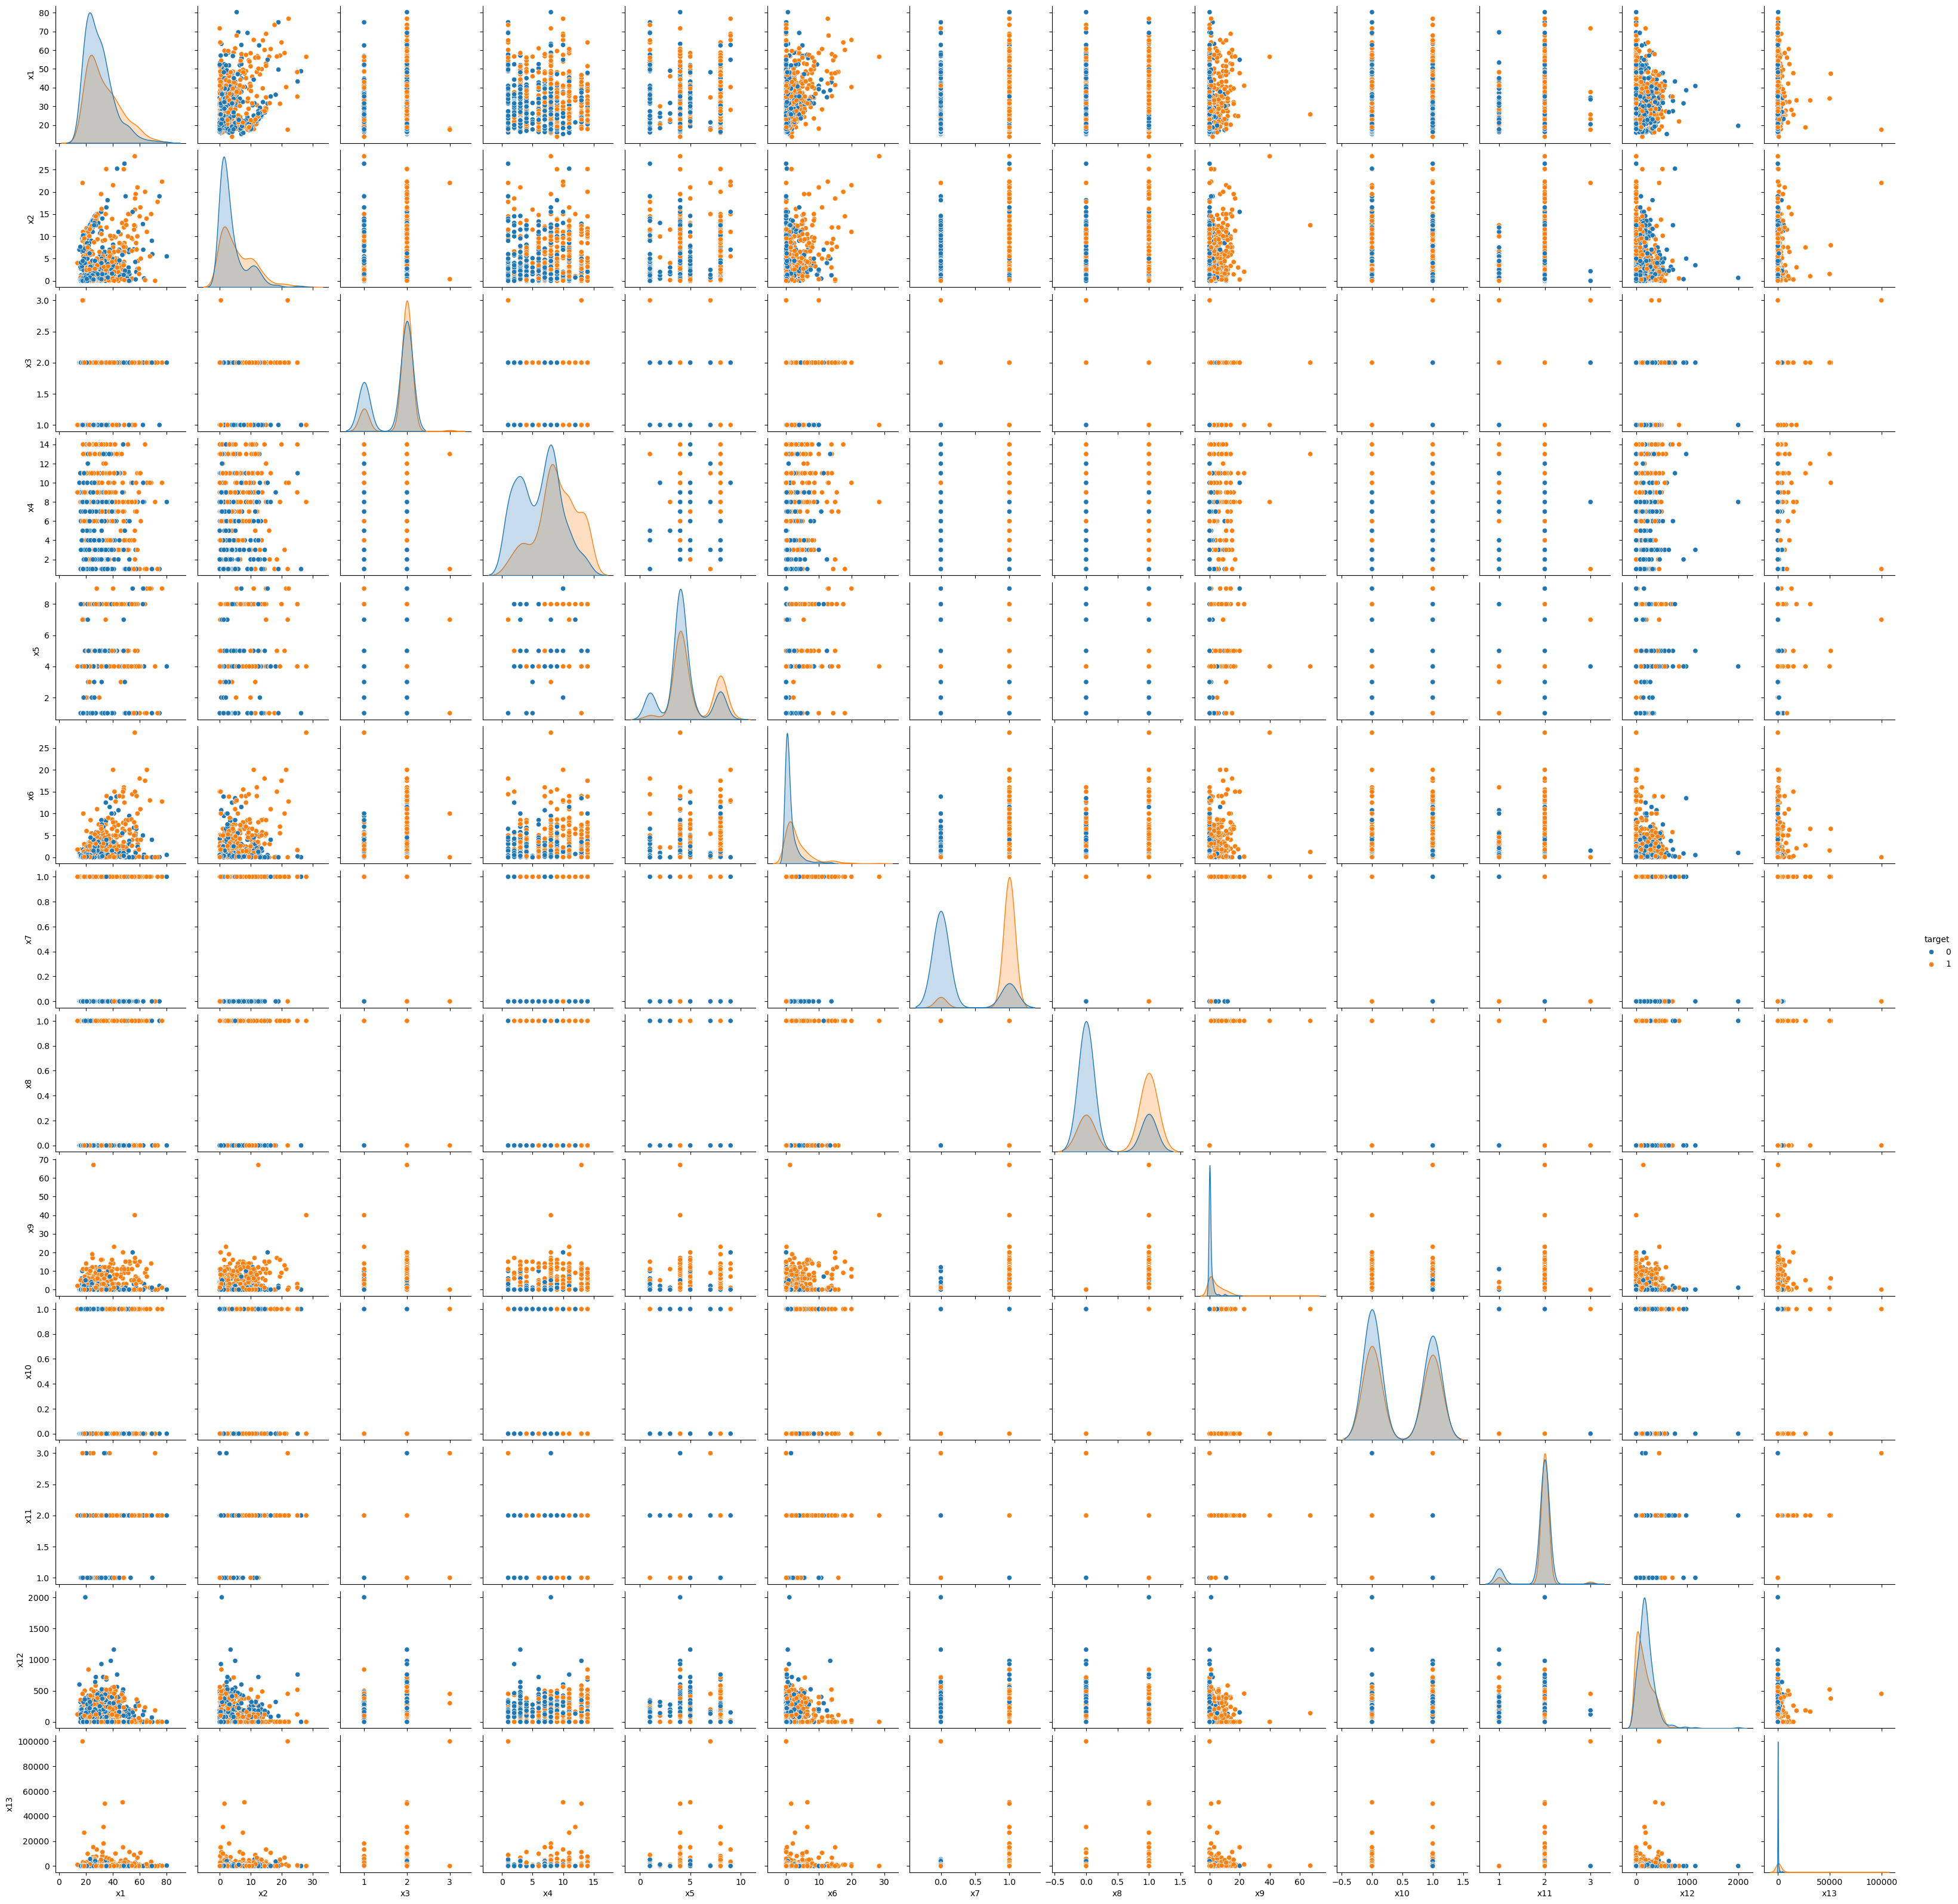

In [6]:
sns.pairplot(df, hue = 'target')
plt.show()

Having shown the combinations of probable number of defaults, can see the number of people who could default? 
Certainly, but it would be based on assumptions. 

How many people could get the loan approval though? It would be done by comparing to the 'targets'

In [7]:
df['target'].value_counts()

target
0    383
1    307
Name: count, dtype: int64

If we take those with any default on their loans as "1", and non-defaulters as "0", we conclude that the non-default numbering 383 people will get the loan.

However, we could also consider the (0,1) as (female, male) respectively to see who could get the loan considering a particular catergory of information in the dataset, say "x5" or any other.

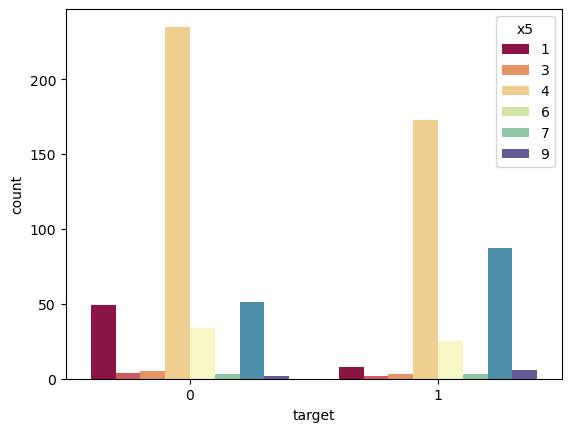

In [8]:
# Assuming category 'x5' is an information on where a particular sex have a PD
sns.countplot(x='target', data=df, hue = 'x5', palette='Spectral')
plt.show()

Assuming the data above is about "loan intent", it would give us an idea, how the loan to the female would be more beneficial and less risky than to men.

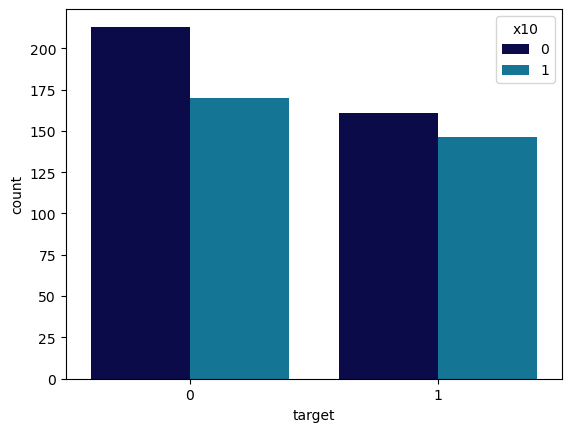

In [9]:
# Assuming category 'x10' is an information on where educational background would influence credit approval (PD)
sns.countplot(x='target', data=df, hue = 'x10', palette='ocean')
plt.show()

Turning the table a little, let's assume that the information above is about "educational background", where females in the dataset have earned higher education than the males( still hypothetical)

We realize how again, the females (0) have higher education count than the males (1) the data... influencing credit approval from the lender/bank

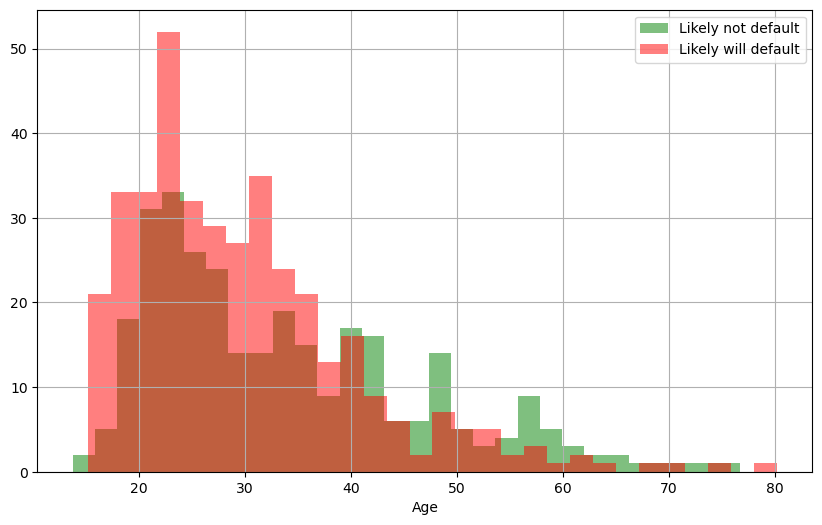

In [10]:
# Assuming category 'x1' is an information serving as individuals ages, it appears so
plt.figure(figsize=(10,6))
df[df['target']==1]['x1'].hist(alpha=0.5,color='green',bins=30,label='Likely not default')
df[df['target']==0]['x1'].hist(alpha=0.5,color='red',bins=30,label='Likely will default')
plt.legend()
plt.xlabel('Age')
plt.show()

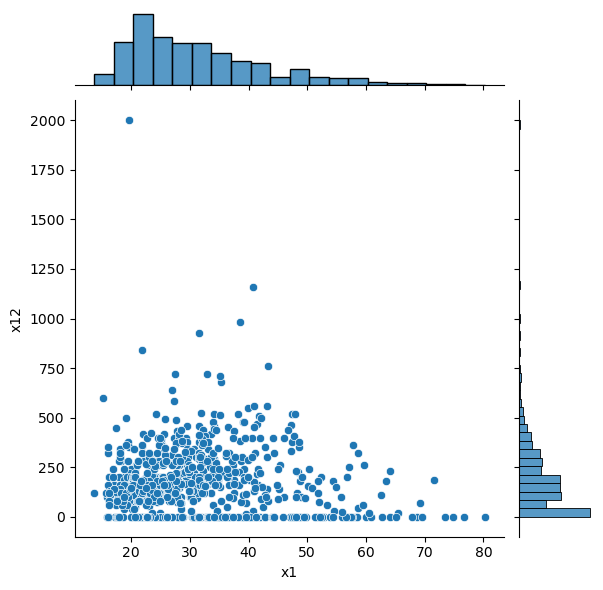

In [11]:
# further exploring the 'x1' data

sns.jointplot(x='x1',y='x12', data=df)
plt.show()

### ML Models

1. Artificial Neural Networks (ANNs)

In [12]:
! pip install tensorflow

In [13]:
! pip install keras-tuner


In [14]:
# importing packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [15]:
# Encode target variable (0: Good Credit, 1: Bad Credit)
y = df['target']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [16]:
x = df.drop(columns = 'target')

In [17]:
# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(x, drop_first=True)

In [18]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Building the ANN model

# Define a Sequential Neural Network
model = Sequential()

# Input layer and hidden layers
model.add(Dense(120, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification (0 or 1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Train the Model
print("Training the model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=54,
    verbose=1
)

Training the model...
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4883 - loss: 0.7175 - val_accuracy: 0.8116 - val_loss: 0.6062
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7443 - loss: 0.6107 - val_accuracy: 0.8768 - val_loss: 0.5067
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8332 - loss: 0.5014 - val_accuracy: 0.8768 - val_loss: 0.4135
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8302 - loss: 0.4347 - val_accuracy: 0.8768 - val_loss: 0.3604
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8808 - loss: 0.3411 - val_accuracy: 0.8768 - val_loss: 0.3470
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8560 - loss: 0.3505 - val_accuracy: 0.8841 - val_loss: 0.3495
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8785 - loss: 0.3121 - val_accuracy: 0.8768 - val_loss: 0.3553
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8462 - loss: 0.3589 - val_accur

In [21]:
#  Evaluate the model
print("\nEvaluating the model...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")



Evaluating the model...
Test Loss: 0.4131, Test Accuracy: 0.8768


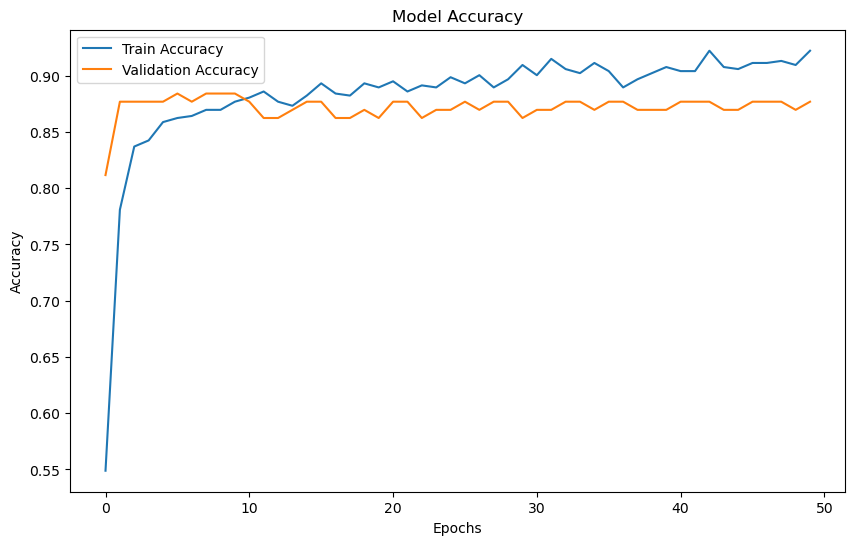

In [22]:
# Visualize Training Performance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

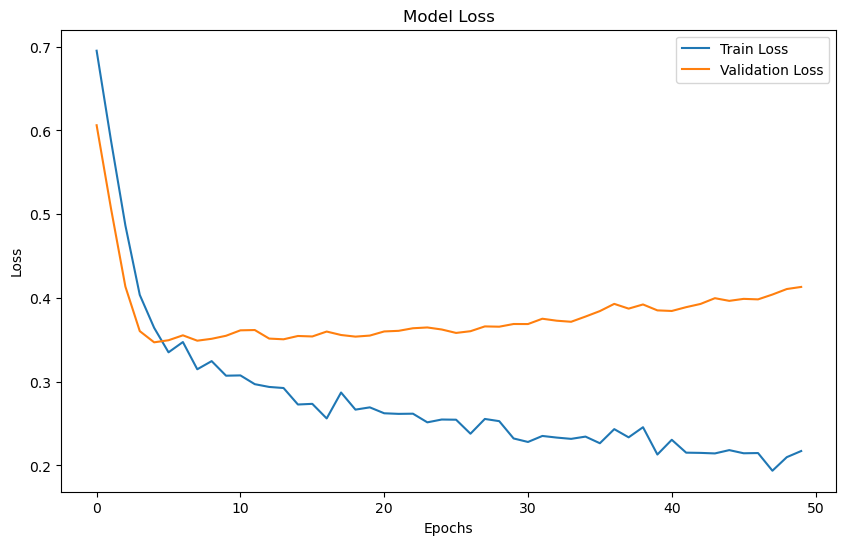

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

To improve the model, we would use hyperparameter tuning from the 'keras' package to further learn the data well.

The procedure above is valid for hypertuning; however, we see it sig when we use the loop( you can also use the GridSearch package) to find the optimal hyperparameters for our model.


In [24]:
import keras_tuner as kt 
from tensorflow.keras.optimizers import Adam

 # Define a model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(Dense(hp.Int('units_input', min_value=32, max_value=128, step=16), 
                    activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(hp.Float('dropout_input', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Hidden layers
    for i in range(hp.Int('num_hidden_layers', 1, 3)):  # Tune the number of hidden layers
        model.add(Dense(hp.Int(f'units_{i}', min_value=32, max_value=128, step=16), 
                        activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [25]:
# Initialize Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='kt_tuning',
    project_name='credit_risk_ann'
)

Reloading Tuner from kt_tuning\credit_risk_ann\tuner0.json


In [26]:
# Hyperparameter search
print("Starting Hyperparameter Tuning...")
tuner.search(X_train, y_train, validation_data=(X_test, y_test), batch_size=32)

Starting Hyperparameter Tuning...


In [27]:
# Retrieve the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best Hyperparameters:
- Units in input layer: {best_hps.get('units_input')}
- Dropout rate (input layer): {best_hps.get('dropout_input')}
- Number of hidden layers: {best_hps.get('num_hidden_layers')}
- Learning rate: {best_hps.get('learning_rate')}
""")


Best Hyperparameters:
- Units in input layer: 32
- Dropout rate (input layer): 0.30000000000000004
- Number of hidden layers: 1
- Learning rate: 0.0006204649496530797



In [28]:
# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=8, verbose=1)

Epoch 1/6
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5471 - loss: 0.7193 - val_accuracy: 0.7681 - val_loss: 0.6228
Epoch 2/6
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6714 - loss: 0.6243 - val_accuracy: 0.8261 - val_loss: 0.5205
Epoch 3/6
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8059 - loss: 0.5081 - val_accuracy: 0.8478 - val_loss: 0.4553
Epoch 4/6
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8264 - loss: 0.4460 - val_accuracy: 0.8551 - val_loss: 0.4159
Epoch 5/6
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.4251 - val_accuracy: 0.8623 - val_loss: 0.3921
Epoch 6/6
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 0.4025 - val_accuracy: 0.8768 - val_loss: 0.3776


In [29]:
# Evaluate the model
print("\nEvaluating the best model...")
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Evaluating the best model...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8782 - loss: 0.3904 
Test Loss: 0.3776, Test Accuracy: 0.8768


In [31]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping callback to monitor validation loss
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best weights from the epoch with minimum loss
)

# Train the best model with EarlyStopping
print("\nTraining the best model with EarlyStopping...")
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,           # Max epochs
    batch_size=32,
    callbacks=[early_stopping],  # Add EarlyStopping callback
    verbose=1
)

# Evaluate the model
print("\nEvaluating the best model...")
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")



Training the best model with EarlyStopping...
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8407 - loss: 0.3946 - val_accuracy: 0.8768 - val_loss: 0.3737
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8456 - loss: 0.3660 - val_accuracy: 0.8768 - val_loss: 0.3715
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8365 - loss: 0.3783 - val_accuracy: 0.8696 - val_loss: 0.3693
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8607 - loss: 0.3598 - val_accuracy: 0.8768 - val_loss: 0.3673
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8583 - loss: 0.3521 - val_accuracy: 0.8841 - val_loss: 0.3654
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8411 - loss: 0.3714 - val_accuracy: 0.8841 - val_loss: 0.3637
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8613 - loss: 0.3426 - val_accuracy: 0.8841 - val_loss: 0.3629
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8655 - 

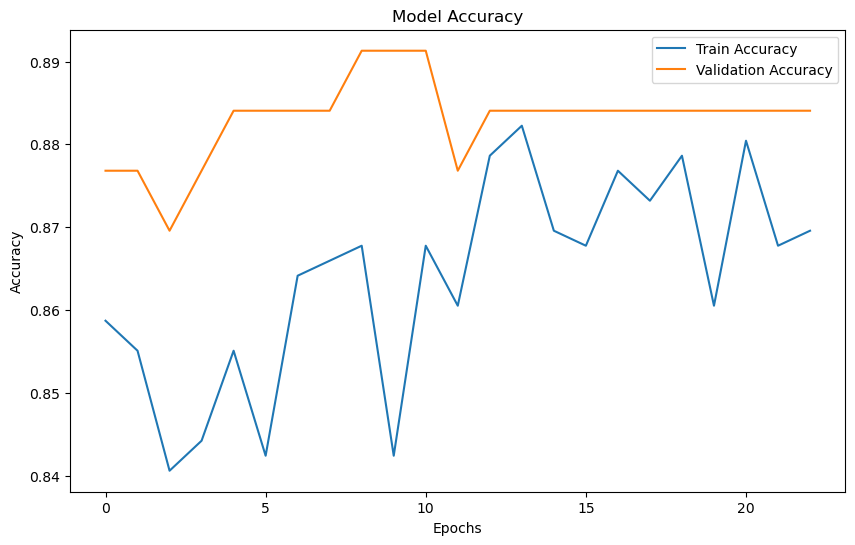

In [32]:
# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


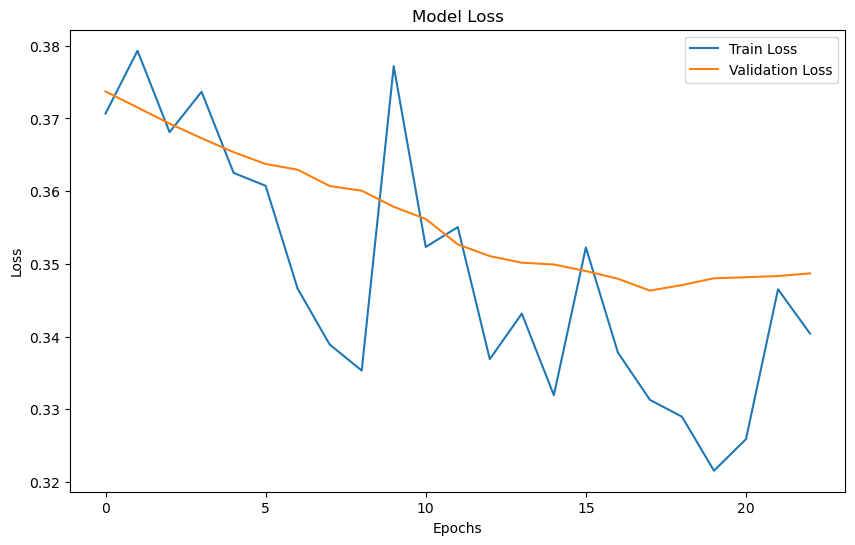

In [33]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We realize the hyperparameter search method did not much improve our first ANN model for the creditor behavior analysis. 

We further move to a basic prediction using K-Nearest Neighbour (KNN) on the credit risk data.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNN Classifier
k = 12  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

In [37]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [38]:
print(f"\nAccuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8696

Confusion Matrix:
[[82  5]
 [13 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        87
           1       0.88      0.75      0.81        51

    accuracy                           0.87       138
   macro avg       0.87      0.84      0.85       138
weighted avg       0.87      0.87      0.87       138



The high precision, recall and accuracy % means our model is performing well. Thus, a model with high recall ensures fewer defaults, while a model with high precision avoids rejecting good customers.


KNN performed well on the credit risk data. Other researchers or analysts can try out Manhattan distance, etc

# Precision-Recall and ROC-AUC Curves

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


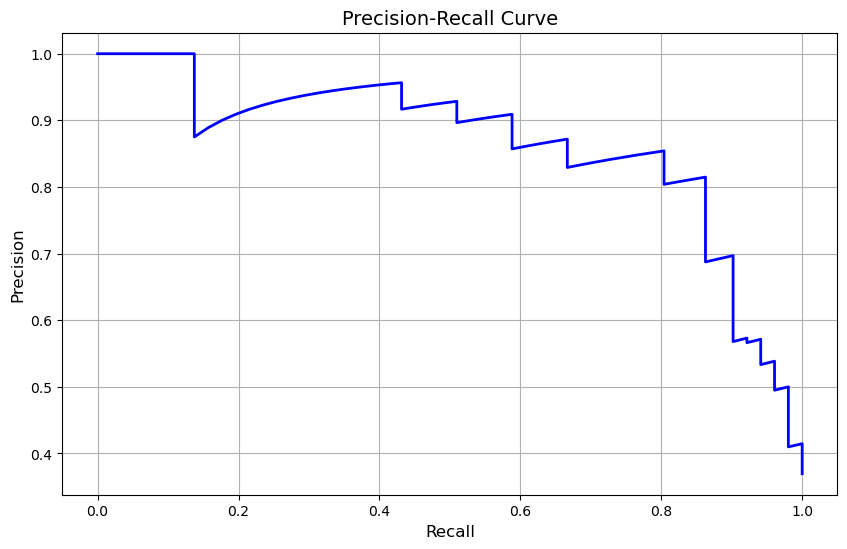

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

y_pred_prob = model.predict(X_test).flatten()  # Ensure the output is a 1D array
y_test = y_test  # True labels (0 or 1)

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.grid()
plt.show()

The curve above focuses on the trade-off between precision (minimizing false positives) and recall (minimizing false negatives)

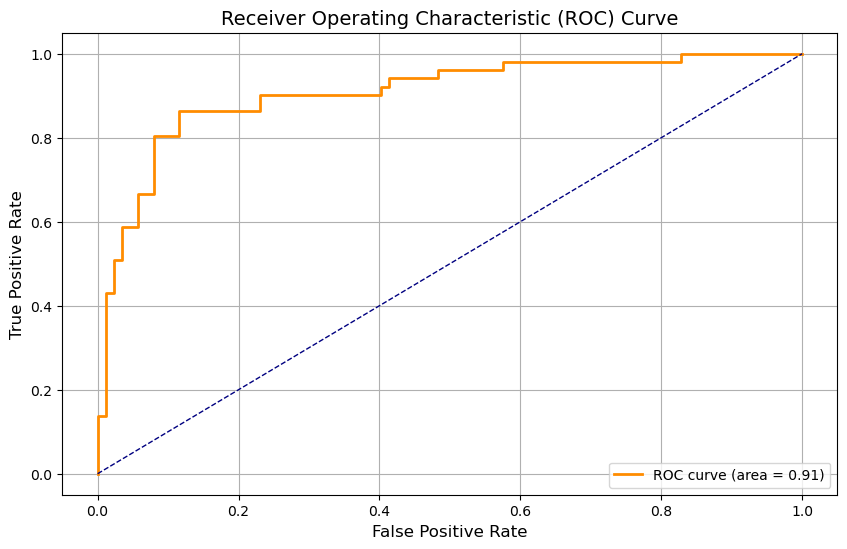

In [44]:
# ROC-AUC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid()
plt.show()

The curve above displays the trade-off between the true positive rate (sensitivity) and the false positive rate. The ROC curve area of 91% shows how our ML model efficient for the credit risk analysis.